In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [126]:
class ARMA:
    def __init__(self,data):
        self.mean = data.mean()
        self.data = data - self.mean
    
    def sample_autocovariance_function(self,lag):
        self.data = np.array(self.data)
        lag = abs(lag)
        n = len(self.data)
        if lag >= n:
            raise ValueError('lag out of range')
        return (1.0/n)*sum(self.data[-(n-lag):]*self.data[:n-lag])

    def sample_autococorrelation_function(self,lag):
        return self.sample_autocovariance_function(lag)/self.sample_autocovariance_function(0)

    def sample_covariance_matrix(self,k):
        row = []
        for l in range(k):
            row.append(self.sample_autocovariance_function(l))
        matrix = []
        for l in range(k):
            matrix.append(row[1:1+l][::-1]+row[:k-l])
        return np.matrix(matrix)

    def partial_autocorrelation_function(self,k):
        if k==0:
            return 1
        Gamma_k = self.sample_covariance_matrix(k)
        gamma_k = np.matrix([self.sample_autococorrelation_function(l) for l in range(1,k+1)]).T
        return (np.linalg.inv(Gamma_k)*gamma_k).item((k-1,0))

    def plot_ACF(self,limit=None):
        if not limit:
            limit=len(self.data)
        AC = []
        for lag in range(1,limit):
            AC.append(self.sample_autococorrelation_function(lag))
        plt.bar(list(range(1,limit)),AC)
        plt.axhline(1.96/np.sqrt(len(self.data)), linestyle='--',alpha=0.6)
        plt.axhline(-1.96/np.sqrt(len(self.data)), linestyle='--',alpha=0.6)
        plt.xlabel('lag')
        plt.ylabel('ACF')
        
    def fit_ar(self,p):
        Gamma = self.sample_covariance_matrix(p)
        gamma = np.matrix([self.sample_autocovariance_function(l) for l in range(1,p+1)]).T
        self.coefs = np.linalg.inv(Gamma)*gamma

In [302]:
def simulate_arma(phi=[],theta=[],simulations=100):
    phi = phi
    theta = [1] + theta
    Z = [np.random.normal() for k in range(simulations+len(phi)+len(theta))]
    X = []
    for k in range(len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)])))
    for k in range(len(phi),simulations+len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)]))+sum(-a*b for a,b in zip(phi,X[::-1][:len(phi)])))
    return np.array(X[len(phi):])

In [170]:
k=50
sum(-a*b for a,b in zip(phi,X[k-len(phi):k]))

1.8028575524921893

In [171]:
list(zip(phi,X[k-len(phi):k]))

[(1, -1.6582529891565407), (0.9, -0.16067173703960957)]

In [307]:
[0,1,2,3,4][::-1][:2]

[4, 3]

In [144]:
X = []
for k in range(simulations+len(phi)):
    X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)])))

In [145]:
len(X)

101

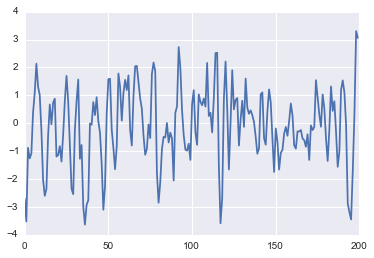

In [317]:
example1 = simulate_arma(phi=[-0.9,0.5],simulations=200)
plt.plot(example1)

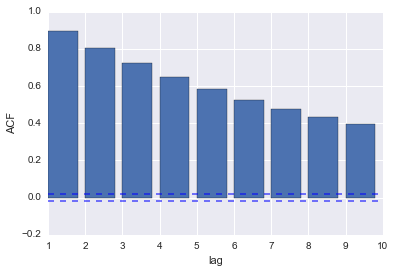

In [303]:
ARMA(simulate_arma(phi=[-0.9],simulations=10000)).plot_ACF(limit=10)

In [329]:
example1 = simulate_arma(phi=[-0.9,0.5],simulations=100000)
model1 = ARMA(example1)

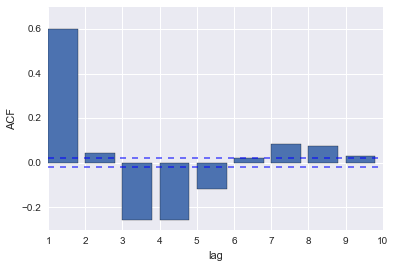

In [324]:
model1.plot_ACF(limit=10)

In [334]:
model1.fit_ar(300)

In [335]:
model1.coefs

matrix([[  9.00202570e-01],
        [ -5.09808123e-01],
        [  7.77379264e-03],
        [ -1.57102291e-03],
        [ -4.11523973e-03],
        [ -1.14135565e-04],
        [ -1.20084968e-03],
        [  5.97244239e-03],
        [ -1.10023167e-02],
        [  9.09986264e-03],
        [ -1.36721564e-03],
        [ -5.48211766e-03],
        [  5.65671723e-03],
        [  4.02505341e-04],
        [ -1.88285036e-03],
        [  2.63348928e-03],
        [ -1.32942261e-03],
        [  7.32076125e-03],
        [ -9.82772778e-03],
        [  1.13346123e-02],
        [ -1.22677493e-02],
        [  8.39559655e-03],
        [  1.54936932e-03],
        [ -5.72269163e-03],
        [  2.63143232e-03],
        [  1.84315554e-03],
        [ -3.83957485e-03],
        [  1.17752089e-03],
        [  3.59960094e-03],
        [ -8.29816894e-03],
        [  1.34475304e-02],
        [ -6.88579283e-03],
        [  5.13385163e-03],
        [ -3.20715338e-03],
        [  1.28218205e-03],
        [ -8.7325193

In [297]:
model1.sample_autococorrelation_function(1)

0.89972459833170737